# Вариант 11
## Егоров Алексей БПМ214

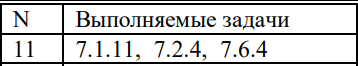

### 7.1.11

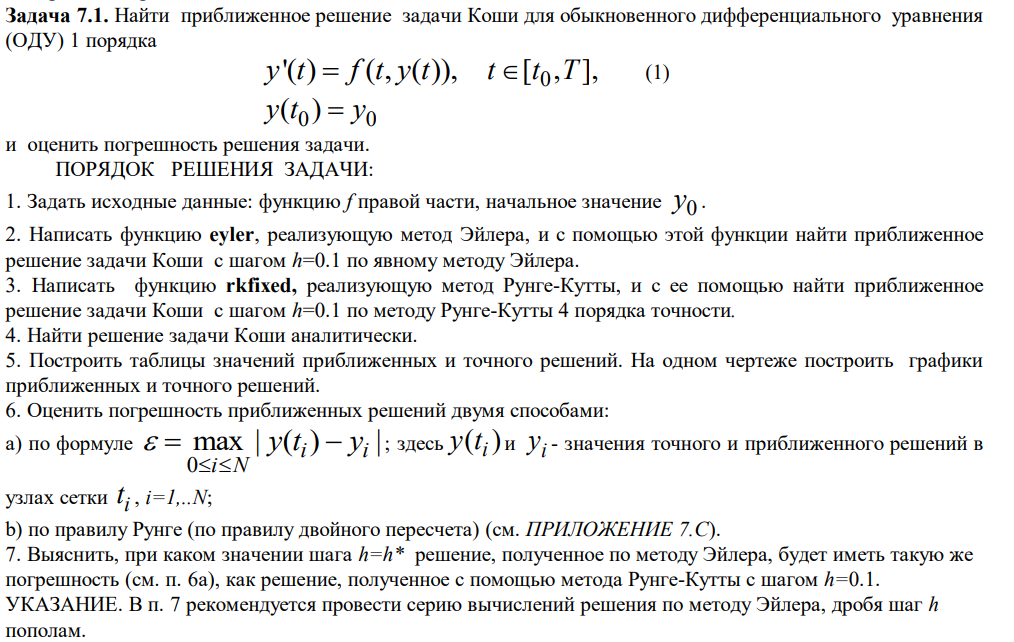

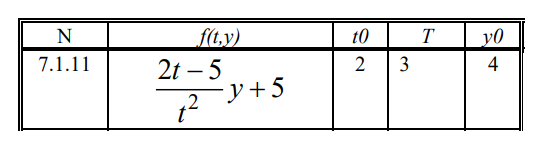

In [539]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [193]:
def f(t, y):
    return (2 * t - 5) / t**2 * y + 5
t0, T = 2, 3
y0 = 4
h = 0.1

### Аналитическое решение: $y(t) = t^2$

In [200]:
def eyler(f, t0, T, y0, h=0.1):
    n = int((T - t0) / h)
    ys = []
    ts = []
    yi, ti = y0, t0

    ys.append(yi)
    ts.append(ti)
    
    for i in range(1, n + 1):
        yi = yi + h*f(ti, yi)
        ti += h
        
        ys.append(yi)
        ts.append(ti)
        
    return [np.array(ys), np.array(ts)]
        

In [201]:
def rkfixed(f, t0, T, y0, h=0.1):
    n = int((T - t0) / h)
    ys = []
    ts = []
    yi, ti = y0, t0
    
    ys.append(yi)
    ts.append(ti)
    
    for i in range(1, n + 1):
        k1 = f(ti, yi)
        k2 = f(ti + h/2, yi + h * k1 / 2)
        k3 = f(ti + h/2, yi + h * k2 / 2)
        k4 = f(ti + h, yi + h * k2) 
        yi = yi + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        ti += h
        
        ys.append(yi)
        ts.append(ti)
        
    return [np.array(ys), np.array(ts)]
    

In [202]:
def f_analytic(t):
    return t**2

In [203]:
# Метод Эйлера
ys_eyler, ts_eyler = eyler(f, t0, T, y0)

#Метод Рунге-Кутты
ys_rkfixed, ts_rkfixed = rkfixed(f, t0, T, y0)

#Аналитическое решение
ts_analytic = np.linspace(t0, T, int((T - t0) / h) + 1)
ys_analytic = ts_analytic**2

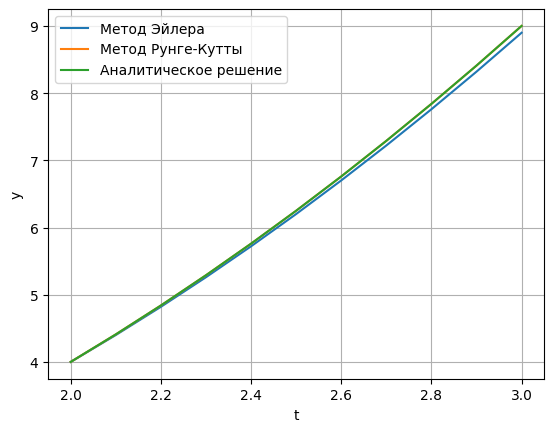

In [204]:
plt.plot(ts_eyler, ys_eyler, label='Метод Эйлера')
plt.plot(ts_rkfixed, ys_rkfixed, label='Метод Рунге-Кутты')
plt.plot(ts_analytic, ys_analytic, label='Аналитическое решение')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend()

In [205]:
eps_eyler = np.max(np.abs(ys_eyler - ys_analytic))
eps_rkfixed = np.max(np.abs(ys_rkfixed - ys_analytic))

print(f'Погрешность решения методом Эйлера:\t{eps_eyler}')
print(f'Погрешность решения методом Рунге-Кутты 4 порядка точности:\t{eps_rkfixed}')

Погрешность решения методом Эйлера:	0.10123878346601423
Погрешность решения методом Рунге-Кутты 4 порядка точности:	8.434353464537026e-07


In [206]:
ys_eyler_runge, _ = eyler(f, t0, T, y0, h/2)
ys_rkfixed_runge, _ = rkfixed(f, t0, T, y0, h/2)


eps_eyler_runge = np.max(np.abs(ys_eyler_runge[::2] - ys_eyler))
eps_rkfixed_runge = np.max(np.abs(ys_rkfixed_runge[::2] - ys_rkfixed)/15)

print('Погрешность по правилу Рунге (по правилу двойного пересчета):')
print(f'Погрешность решения методом Эйлера:\t{eps_eyler_runge}')
print(f'Погрешность решения методом Рунге-Кутты 4 порядка точности:\t{eps_rkfixed_runge}')

Погрешность по правилу Рунге (по правилу двойного пересчета):
Погрешность решения методом Эйлера:	0.05049189121462838
Погрешность решения методом Рунге-Кутты 4 порядка точности:	4.8933887815868124e-08


In [207]:
h_curr, h1 = h, eps_eyler

while h1 >= eps_rkfixed:
    h_curr = h_curr / 2
    n = np.int32((T - t0) / h_curr)
    ys_analytic_curr = np.array([f_analytic(t0 + i * h_curr) for i in range(n + 1)])
    ys_eyler_curr, _ = eyler(f, t0, T, y0, h_curr)
    h1 = np.max(np.abs(ys_eyler_curr - ys_analytic_curr))

print(f'При размере шага h = {h1} решение, полученное по методу Эйлера, будет иметь такую же погрешность, как решение, полученное с помощью метода Рунге-Кутты с шагом h=0.1.')

При размере шага h = 7.766727847524635e-07 решение, полученное по методу Эйлера, будет иметь такую же погрешность, как решение, полученное с помощью метода Рунге-Кутты с шагом h=0.1.


### 7.2.4

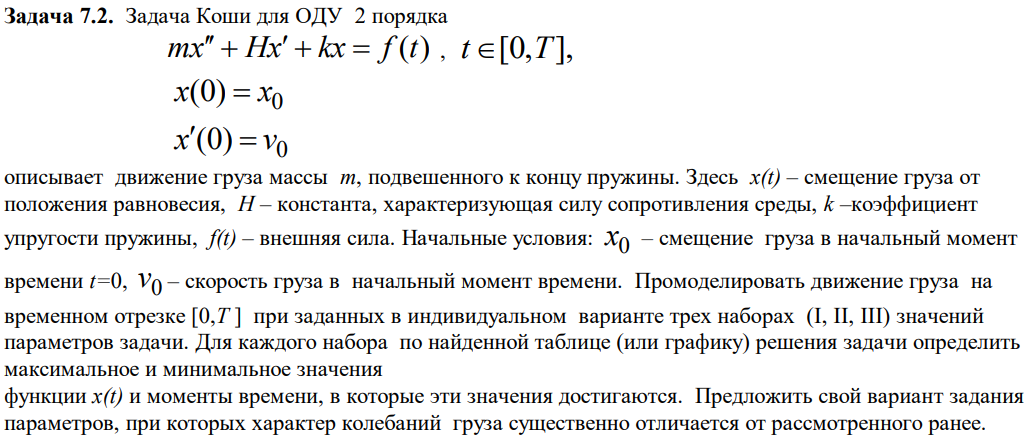

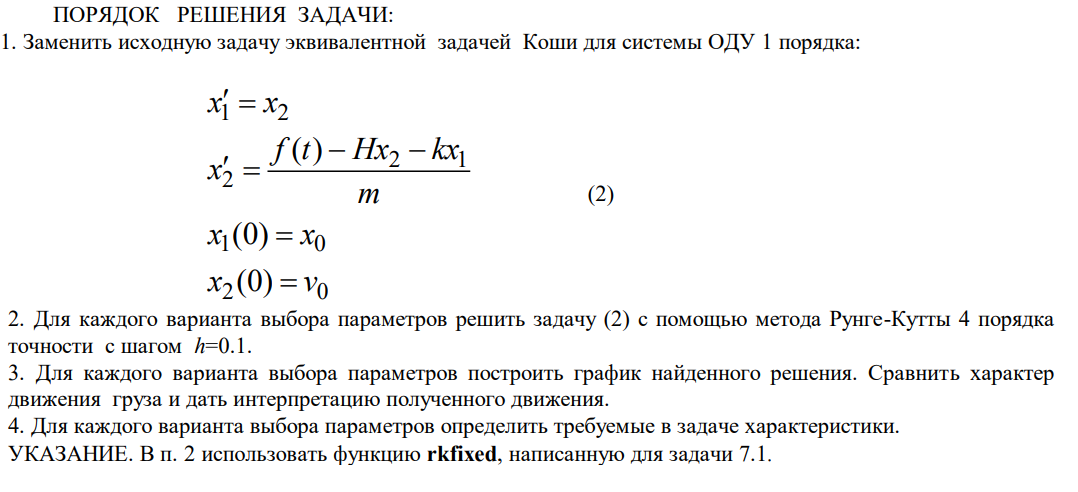

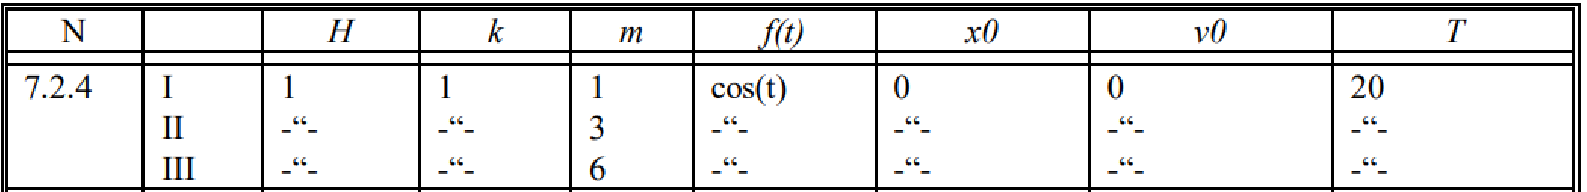

In [541]:
x0, v0 = 0, 0
xs0 = np.array([x0, v0])
H = 1
k = 1
ms = [10000,3,6]
T = 20
h = 0.1

In [542]:
def fs(t, x, m, coeffs={'H' : 1, 'k' : 1}):
    return [x[1], (np.cos(t) - coeffs['H'] * x[1] - coeffs['k'] * x[0]) / m]

In [543]:
def rkfixed_multidim(fs, t0, T, y0, m, h=0.1, coeffs={'H' : 1, 'k' : 1}):
    dim = len(y0)
    n = int((T - t0) / h)
    ys = np.zeros((dim, n+1))
    ys[:, :1] = np.array(y0).reshape(dim, 1)
    ti = t0
    for i in range(n):
        k1 = np.array(fs(ti, ys[:, i], m, coeffs))
        k2 = np.array(fs(ti + h/2, ys[:, i] + h/2 * k1, m, coeffs))
        k3 = np.array(fs(ti + h/2, ys[:, i] + h/2 * k2, m, coeffs))
        k4 = np.array(fs(ti + h, ys[:, i] + h * k3, m, coeffs))
        kn = 1/6*(k1 + 2 * k2 + 2 * k3 + k4)
        ys[:, i+1] = ys[:, i] + h*kn
    return ys[:, 0:]


In [544]:
ys_rkfixed_m1 = rkfixed_multidim(fs, 0, T, xs0, ms[0])[1]
ys_rkfixed_m3 = rkfixed_multidim(fs, 0, T, xs0, ms[1])[1]
ys_rkfixed_m6 = rkfixed_multidim(fs, 0, T, xs0, ms[2])[1]

In [545]:
print('Для случая с массой 1:')
print(f'max: {np.max(ys_rkfixed_m1)}, t: {np.arange(0, T + h, h)[np.where(ys_rkfixed_m1 == np.max(ys_rkfixed_m1))][0]}')
print(f'min: {np.min(ys_rkfixed_m1)}, t: {np.arange(0, T + h, h)[np.where(ys_rkfixed_m1 == np.min(ys_rkfixed_m1))][0]}')
print('Для случая с массой 3:')
print(f'max: {np.max(ys_rkfixed_m3)}, t: {np.arange(0, T + h, h)[np.where(ys_rkfixed_m3 == np.max(ys_rkfixed_m3))][0]}')
print(f'min: {np.min(ys_rkfixed_m3)}, t: {np.arange(0, T + h, h)[np.where(ys_rkfixed_m3 == np.min(ys_rkfixed_m3))][0]}')
print('Для случая с массой 6:')
print(f'max: {np.max(ys_rkfixed_m6)}, t: {np.arange(0, T + h, h)[np.where(ys_rkfixed_m6 == np.max(ys_rkfixed_m6))][0]}')
print(f'min: {np.min(ys_rkfixed_m6)}, t: {np.arange(0, T + h, h)[np.where(ys_rkfixed_m6 == np.min(ys_rkfixed_m6))][0]}')

Для случая с массой 1:
max: 0.0019814017239860415, t: 20.0
min: 0.0, t: 0.0
Для случая с массой 3:
max: 0.39205640124683316, t: 2.3000000000000003
min: -0.1520678572239544, t: 8.0
Для случая с массой 6:
max: 0.306584941678658, t: 3.4000000000000004
min: -0.1592492191692902, t: 11.3


Text(0.5, 1.0, 'Графики движения грузов, подвешенных на пружине')

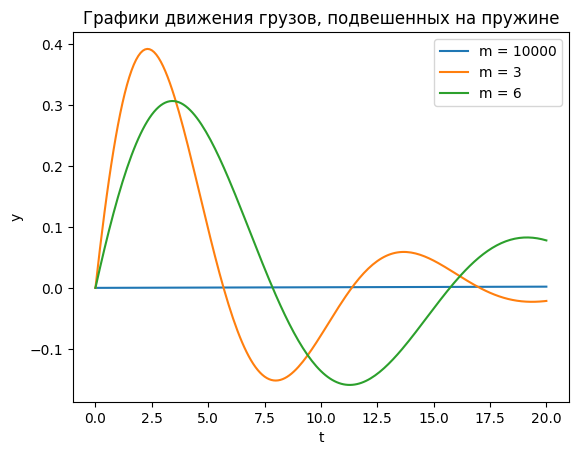

In [546]:
plt.plot(np.arange(0, T + h, h) , ys_rkfixed_m1, label=f'm = {ms[0]}')
plt.plot(np.arange(0, T + h, h) , ys_rkfixed_m3, label=f'm = {ms[1]}')
plt.plot(np.arange(0, T + h, h) , ys_rkfixed_m6, label=f'm = {ms[2]}')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Графики движения грузов, подвешенных на пружине')

График показывает, что с увеличением массы груза амплитуда колебаний увеличивается, а частота колебаний уменьшается. Это соответствует ожидаемому поведению для гармонического осциллятора, где период колебаний пропорционален квадратному корню из массы груза. Это явление называется простым гармоническим движением и является основой для многих физических систем.

**Сделаем пружину намного жестче. Видим, что величина отклонения стала меньше**

In [440]:
ys_rkfixed_test1 = rkfixed_multidim(fs1, 0, T, np.array([0, 0]), 1, 0.1, {'H': 1, 'k': 100})[1]

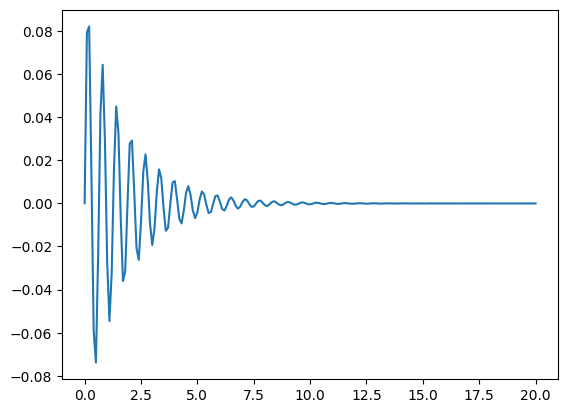

In [441]:
plt.plot(np.arange(0, T + h, h), ys_rkfixed_test1)

**Если увеличить силу сопротивления среды, то это приведет к уменьшению амплитуды колебаний и увеличению времени затухания колебаний.**

In [442]:
ys_rkfixed_test2 = rkfixed_multidim(fs1, 0, T, np.array([0, 0]), 1, 0.1, {'H': 10, 'k': 1})[1]

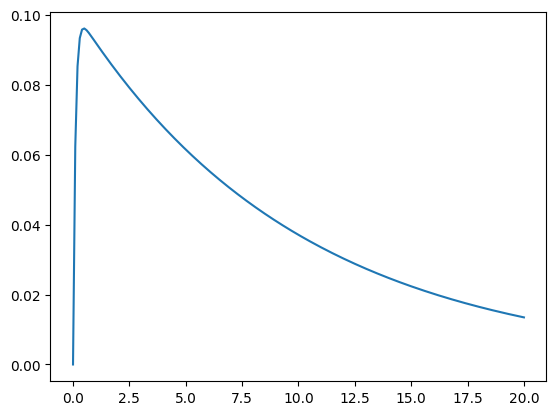

In [443]:
plt.plot(np.arange(0, T + h, h), ys_rkfixed_test2)

### 7.6.4

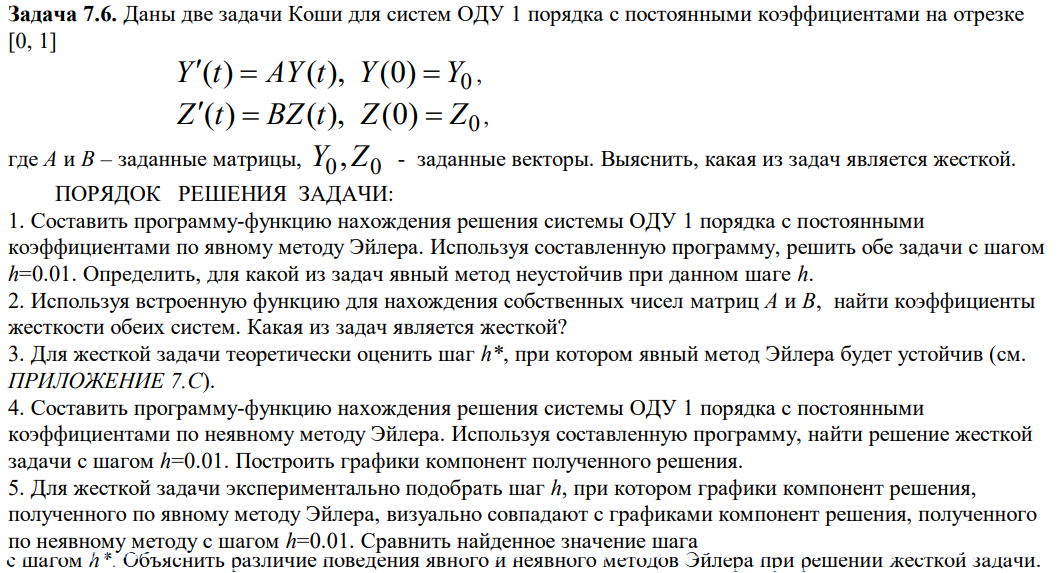

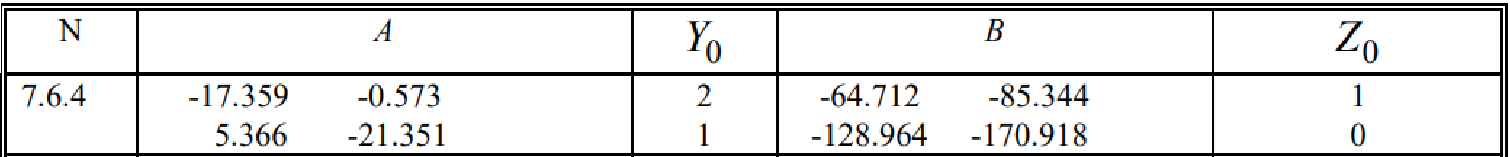

In [489]:
from scipy.linalg import eigvals

In [490]:
A = np.array([[-27.359, -0.573], [5.366, -21.351]])
B = np.array([[-64.712, -85.344], [-128.964, -170.918]])
Y0 = np.array([2, 1])
Z0 = np.array([1, 0])

In [504]:
# Явный метод Эйлера
def euler_explicit(A, Y0, h):
    N = int(1/h)
    Y = np.zeros((N+1, len(Y0)))
    Y[0] = Y0
    for n in range(N):
        Y[n+1] = Y[n] + h * np.dot(A, Y[n])
    return Y

# Неявный метод Эйлера
def euler_implicit(A, Y0, h):
    N = int(1/h)
    dim = len(Y0)
    Y = np.zeros((N+1, dim))
    Y[0] = Y0
    I = np.eye(dim)
    for n in range(N):
        Y[n+1] = np.linalg.solve(I - h * A, Y[n])
    return Y

# Определение жесткости
def stiffness(A):
    eigenvalues = eigvals(A)
    return max(np.abs(np.real(np.array(eigenvalues)))) / min(np.abs(np.real(np.array(eigenvalues))))


In [505]:
Y_euler_explicit = euler_explicit(A, Y0, h=0.01)
Z_euler_explicit = euler_explicit(B, Z0, h=0.01)

Y_euler_implicit = euler_implicit(A, Y0, h=0.01)
Z_euler_implicit = euler_implicit(B, Z0, h=0.01)

print("Жесткость системы Y: ", stiffness(A))
print("Жесткость системы Z: ", stiffness(B))

Жесткость системы Y:  1.2225891081952416
Жесткость системы Z:  1023.4782608696106


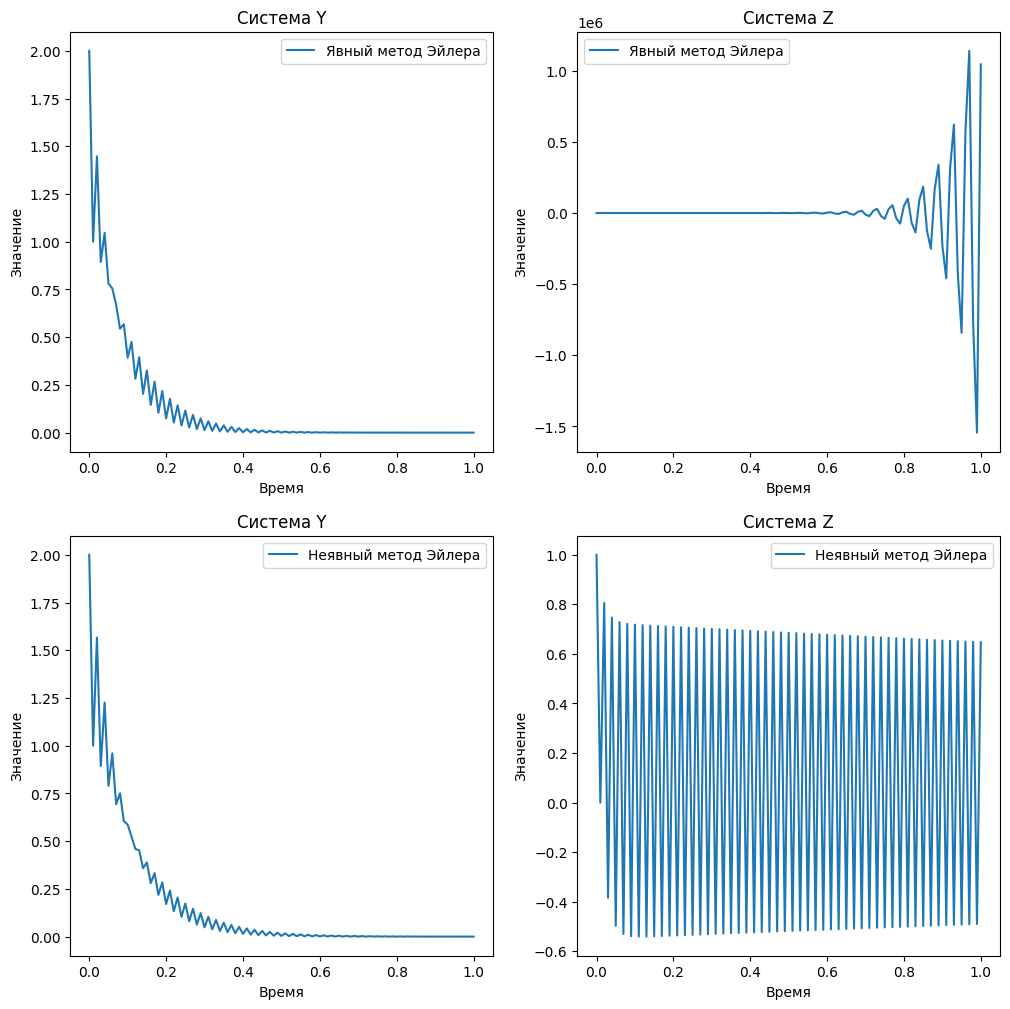

In [506]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize=(12, 12))
axs[0, 0].plot(t, Y_euler_explicit.reshape(2, 101)[0], label='Явный метод Эйлера')
axs[0, 0].set_title('Система Y')
axs[0, 0].set_xlabel('Время')
axs[0, 0].set_ylabel('Значение')
axs[0, 0].legend()

axs[0, 1].plot(t, Z_euler_explicit.reshape(2, 101)[0], label='Явный метод Эйлера')
axs[0, 1].set_title('Система Z')
axs[0, 1].set_xlabel('Время')
axs[0, 1].set_ylabel('Значение')
axs[0, 1].legend()

axs[1, 0].plot(t, Y_euler_implicit.reshape(2, 101)[0], label='Неявный метод Эйлера')
axs[1, 0].set_title('Система Y')
axs[1, 0].set_xlabel('Время')
axs[1, 0].set_ylabel('Значение')
axs[1, 0].legend()

axs[1, 1].plot(t, Z_euler_implicit.reshape(2, 101)[0], label='Неявный метод Эйлера')
axs[1, 1].set_title('Система Z')
axs[1, 1].set_xlabel('Время')
axs[1, 1].set_ylabel('Значение')
axs[1, 1].legend()

Задача Z не устойчива для явного метода Эйлера при шаге h=0.1

Систему Z можем считать жесткой, так как число жесткости много больше 1

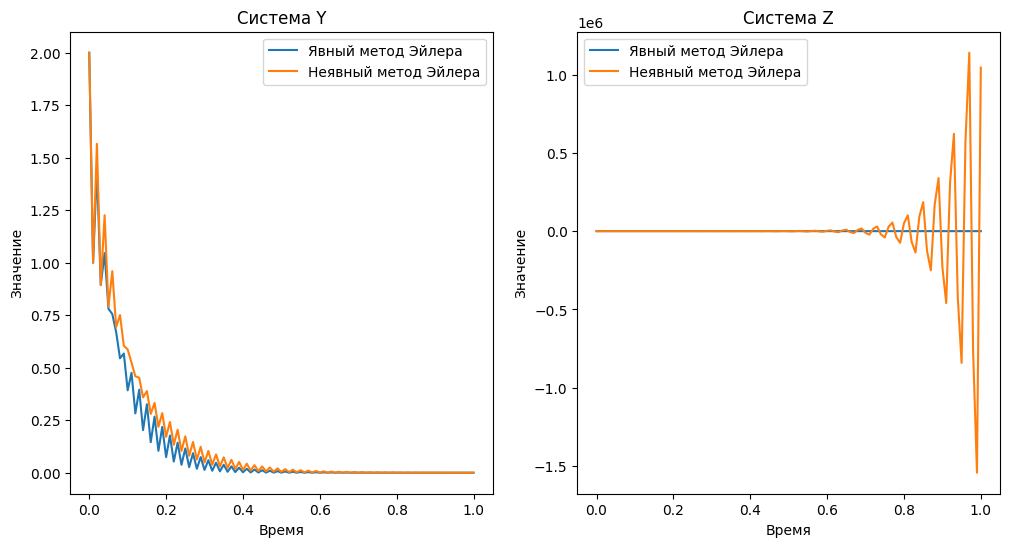

In [507]:
# Построение графиков
t = np.linspace(0, 1, 101)

# Графики для явного метода Эйлера
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(t, Y_euler_explicit.reshape(2, 101)[0], label='Явный метод Эйлера')
plt.plot(t, Y_euler_implicit.reshape(2, 101)[0], label='Неявный метод Эйлера')

plt.title('Система Y')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()

# Графики для неявного метода Эйлера
plt.subplot(122)

plt.plot(t, Z_euler_implicit.reshape(2, 101)[0], label='Явный метод Эйлера')
plt.plot(t, Z_euler_explicit.reshape(2, 101)[0], label='Неявный метод Эйлера')
plt.title('Система Z')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()

plt.show()

In [503]:
#Для задачи Z определяем h*
h1 = 2 / max(np.abs(np.real(np.array(eigvals(B)))))
print(f'При шаге h <= {h1} явный метод Эйлера будет устойчив')

При шаге h <= 0.008496176720475786 явный метод Эйлера будет устойчив


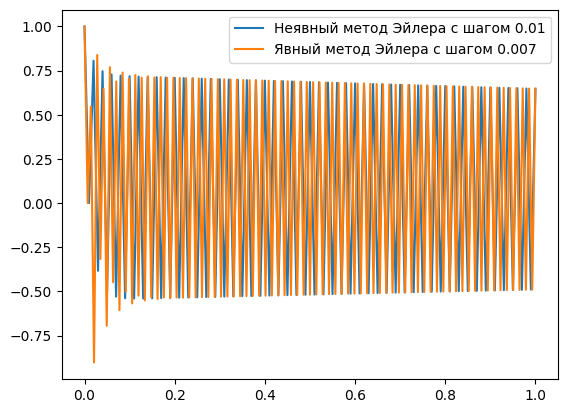

In [537]:
Z_euler_implicit1 = euler_implicit(B, Z0, h=0.01)
h_exp = 0.007
Z_euler_explicit1 = euler_explicit(B, Z0, h=h_exp)
plt.plot(np.linspace(0, 1, int(1/0.01 + 1)), Z_euler_implicit1.reshape(2, int(1/0.01 + 1))[0], label='Неявный метод Эйлера с шагом 0.01')
plt.plot(np.linspace(0, 1, int(1/h_exp + 1)), Z_euler_explicit1.reshape(2, int(1/h_exp + 1))[0], label=f'Явный метод Эйлера с шагом {h_exp}')
plt.legend()

1. Явный метод Эйлера может быть неустойчив, если шаг h слишком велик, особенно для жестких систем. Если решение начинает “взрываться” (т.е. значения становятся очень большими или начинают колебаться без контроля), это может быть признаком неустойчивости.
2. Неявный метод Эйлера обычно более устойчив, потому что он использует информацию о будущем состоянии системы для обновления текущего состояния. Он может справиться с большими значениями h и жесткими системами лучше, чем явный метод.